# Latar Belakang
Dataset ini adalah kumpulan data e-commerce ritel terbesar dari Pakistan. Dataset ini berisi setengah juta catatan transaksi dari Maret 2016 hingga Agustus 2018. Dataset ini dirilis oleh author sehingga para data analis dapat melakukan analisis terhadap Data E-Comerce di Pakistan.

## Pernyataan Masalah
Kita akan menjawab pertanyaan berikut:
* Bagaimanakah cara untuk meningkatkan nilai penjualan?

## Import Library

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

## Data Understanding and Cleaning

Dataset ini berisi informasi terkait demografis, edukasi dan pengalaman kerja kandidat yang diisi ketika peserta mendaftar untuk ikut pelatihan. Ada 14 kolom di dalam dataset hr_analytics, yaitu:  

1. Item_id : Nomor urut dari barcode barang yang dipesan
1. Status : Status barang yang dipesan
1. Created_at : Tanggal dilakukannya pemesanan barang
1. Sku : kode unik yang terdiri dari huruf dan angka yang mengidentifikasi karakteristik setiap produk.
1. Price : Harga tiap unit dari produk yang dijual
1. Qty_ordered : Jumlah total unit barang yang dipesan
1. Grand_total : Total harga keseluruhan yang dibayar oleh customer
1. Increment_id : kode struk
1. Category_name_1 : Kategori barang
1. Sales_commision_code : Kode komisi penjualan
1. Discount_amount : jumlah diskon yang diberikan
1. Payment_method : metode pembayaran
1. Working_date : Jam kerja
1. BI_Status : Memberikan informasi terkait kelanjutan proses pemesanan barang
1. MV : Harga satuan produk
1. Year : Tahun customer bergabung
1. Month : Bulan customer bergabung
1. Customer_since : informasi tanggal,bulan dan tahun customer bergabung
1. M-Y : informasi tentang bulan dan tahun terjadinya transaksi
1. FY : tahun fiskal perusahaan
1. Customer_ID : Nomor customer
1. Unnamed : 21 : Empty Column
1. Unnamed : 22 : Empty Column
1. Unnamed : 23 : Empty Column
1. Unnamed : 24 : Empty Column
1. Unnamed : 25 : Empty Column

Berikut 5 baris teratas dan terbawah dari dataset hr_analitycs.

In [73]:
!gdown 1zuBOhR0pp0vqezvd5fmJX8NEMjaLunVq

Downloading...
From: https://drive.google.com/uc?id=1zuBOhR0pp0vqezvd5fmJX8NEMjaLunVq
To: /content/Pakistan Largest Ecommerce Dataset.csv
100% 107M/107M [00:00<00:00, 211MB/s] 


In [74]:
df=pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
display(df.head(),df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pertama, kita lihat informasi jumlah baris, kolom, dan data di tiap kolomnya.

In [75]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
display(df.info())

Jumlah baris dan kolom di dataset df adalah (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524

None

Bisa kita lihat bahwa kolom 22-26 sebagai empty column tidak memiliki keterangan dan hanya berisi nilai NaN. maka kita perlu menghapus kolom 22-26 untuk memudahkan proses Data Understanding

In [76]:
df.drop(columns=['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace=True)

In [77]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


Secara umum, kita bisa melihat bahwa:
* Pakistan Largest E-Commerce Dataset memiliki 26 kolom dan 1.048.575 baris
* hampir semua kolom memiliki jumlah data kosong yang sama yaitu sebanyak 584.524 data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* beberapa kolom, yaitu, `status`, `sku`, `category_name_1`, `sales_commission_code`, `Customer Since`, dan `Customer ID` memiliki jumlah data kosong yang berbeda. 
* kolom `item_id`, `sku`, `Increment_id`, `sales_commission_code`, dan `Customer ID` berisikan id unik untuk tiap barang, transaksi, dan pelanggan. Kolom tersebut tidak relevan dalam analisis dan bisa dihapus saja.
* ada typo pada kolom MV sehingga perlu diperbaiki untuk memudahkan akses kolom.

### Filter Kolom

Kita akan menghapus kolom-kolom yang tidak relevan dalam analisis.

In [78]:
df.drop(columns=['item_id', 'sku', 'increment_id', 'sales_commission_code', 'Customer ID'], inplace=True)

Kita lakukan perbaikan typo pada kolom.

In [79]:
df.rename(columns={' MV ':'MV'},inplace=True)

### Missing Value

Pertama-tama kita cek terlebih dahulu persentase data kosong dalam data.

In [80]:
df.isna().sum()/df.shape[0]*100

status             44.256825
created_at         44.255394
price              44.255394
qty_ordered        44.255394
grand_total        44.255394
category_name_1    44.271034
discount_amount    44.255394
payment_method     44.255394
Working Date       44.255394
BI Status          44.255394
MV                 44.255394
Year               44.255394
Month              44.255394
Customer Since     44.256443
M-Y                44.255394
FY                 44.255394
dtype: float64

Secara garis besar:  
* *missing value* di semua kolom memiliki proporsi yang tinggi (44%), dengan missing value di kolom `sales_commission_code` mencapai 57.34%.
* missing value dengan jumlah yang sama ini diakibatkan oleh baris berisi data kosong di tiap kolom. baris tersebut bukan termasuk data yang bisa kita olah sehingga persentasenya tidak diperhitungkan dan kita dapat langsung menghapus baris-baris tersebut.

In [81]:
# menghapus baris berisi data kosong
df.dropna(subset=['price'], inplace=True)

Lalu, kita ulang untuk pengecekan persentase data kosong di tiap kolom

In [82]:
df.isna().sum()/df.shape[0]*100

status             0.002566
created_at         0.000000
price              0.000000
qty_ordered        0.000000
grand_total        0.000000
category_name_1    0.028057
discount_amount    0.000000
payment_method     0.000000
Working Date       0.000000
BI Status          0.000000
MV                 0.000000
Year               0.000000
Month              0.000000
Customer Since     0.001882
M-Y                0.000000
FY                 0.000000
dtype: float64

Karena persentase data kosong sangat kecil, maka dapat kita hapus saja baris-baris yang berisi data kosong.

In [83]:
df.dropna(inplace=True)

Sekarang dapat dipastikan tidak ada data kosong dalam dataset.

### Data Duplikat

Kita cek jumlah data duplikat dalam dataset.

In [84]:
df.duplicated().sum()

165841

Karena tidak ada data duplikat, maka tidak ada perlakuan khusus terhadap data duplikat dalam dataset.

### Data Anomali

Untuk mendeteksi nilai anomali, perlu kita lakukan pengecekan terhadap data unik masing-masing kolom.

In [85]:
pd.set_option('display.max_colwidth', -1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, processing, payment_review]"
1,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
2,price,9119,"[1950.0, 240.0, 2450.0, 360.0, 555.0, 80.0, 170.0, 96499.0, 5500.0, 210.0, 156.0, 120.0, 320.0, 1550.0, 420.0, 490.0, 899.25, 899.0, 149.0, 1000.0, 1913.0, 500.0, 100.0, 1500.0, 450.0, 20999.0, 165.0, 435.0, 90.0, 850.0, 3672.0, 7400.0, 3600.0, 143.0, 225.0, 4500.0, 3156.0, 2996.0, 300.0, 150.0, 465.0, 380.0, 350.0, 425.0, 251.0, 510.0, 325.0, 30417.0, 45250.0, 8100.0, 144.0, 5597.0, 999.0, 4950.0, 805.0, 280.0, 1.0, 760.0, 1875.0, 4200.0, 550.0, 1230.0, 370.0, 2.0, 795.0, 4750.0, 520.0, 260.0, 1450.0, 3950.0, 190.0, 16460.0, 599.0, 265.0, 250.0, 25999.0, 3900.0, 75.0, 140.0, 1050.0, 3750.0, 455.0, 1335.0, 10740.0, 230.0, 799.0, 480.0, 1200.0, 4530.0, 1890.0, 185.0, 5.0, 1350.0, 2490.0, 1650.0, 1870.0, 2050.0, 995.0, 285.0, 1099.0, ...]"
3,qty_ordered,73,"[1.0, 2.0, 5.0, 3.0, 4.0, 6.0, 10.0, 34.0, 9.0, 7.0, 14.0, 11.0, 15.0, 8.0, 20.0, 27.0, 12.0, 13.0, 130.0, 16.0, 40.0, 100.0, 50.0, 120.0, 25.0, 22.0, 200.0, 31.0, 97.0, 35.0, 119.0, 24.0, 99.0, 38.0, 30.0, 26.0, 48.0, 19.0, 32.0, 28.0, 37.0, 18.0, 150.0, 300.0, 21.0, 49.0, 17.0, 45.0, 36.0, 56.0, 72.0, 502.0, 33.0, 29.0, 304.0, 1000.0, 52.0, 125.0, 141.0, 180.0, 186.0, 96.0, 187.0, 144.0, 66.0, 60.0, 185.0, 90.0, 70.0, 23.0, 500.0, 380.0, 75.0]"
4,grand_total,36828,"[1950.0, 240.0, 2450.0, 60.0, 1110.0, 80.0, 170.0, 96499.0, 5500.0, 366.0, 120.0, 0.0, 1550.0, 1270.0, 2118.25, 298.0, 3826.0, 3000.0, 450.0, 20999.0, 360.0, 300.0, 940.0, 3672.0, 740.0, 899.0, 11000.0, 168.0, 4500.0, 6152.0, 2210.0, 350.0, 425.0, 850.0, 251.0, 835.0, 30417.0, 700.0, 45250.0, 24588.0, 5597.0, 999.0, 4950.0, 805.0, 280.0, 1.0, 1195.0, 5.0, 2.0, 320.0, 1875.0, 4200.0, 550.0, 1230.0, 880.0, 1440.0, 2745.0, 12150.0, 520.0, 600.0, 3901.0, 1450.0, 3950.0, 760.0, 1125.0, 150.0, 16460.0, 599.0, 155.0, 250.0, 25999.0, 920.0, 3900.0, 3600.0, 140.0, 900.0, 1050.0, 3750.0, 455.0, 2670.0, 10740.0, 1399.0, 480.0, 1000.0, 4530.0, 1890.0, 8.0, 1350.0, 2490.0, 1650.0, 1870.0, 2050.0, 2160.0, 975.0, 1099.0, 720.0, 640.0, 3290.0, 1013.0, 323.0, ...]"
5,category_name_1,16,"[Women's Fashion, Beauty & Grooming, Soghaat, Mobiles & Tablets, Appliances, Home & Living, Men's Fashion, Kids & Baby, \N, Others, Entertainment, Computing, Superstore, Health & Sports, Books, School & Education]"
6,discount_amount,28058,"[0.0, 300.0, 82.5, 217.5, 19.15, 180.85, 77.72, 122.28, 200.0, 149.3, 50.7, 148.57, 51.43, 81.52, 40.76, 157.38, 142.62, 54.79, 35.62, 49.32, 60.27, 1300.65, 1699.35, 136.84, 63.16, 225.0, 75.0, 100.0, 1.0, 141.66, 83.34, 52.63, 94.74, 242.86, 57.14, 134.21, 165.79, 111.11, 88.89, 500.0, 53.73, 52.24, 94.03, 133.33, 66.67, 125.31, 74.69, 195.0, 142.0, 55.0, 182.0, 180.0, 110.0, 70.0, 464.49, 35.51, 246.27, 253.7

data anomali yaitu:
1. `#REF!` pada kolom `BI Status`
1. `\\N` pada kolom `status` dan `category_name_1`.

In [86]:
df = df[(df['BI Status'] != '#REF!') & (df['status'] != '\\N') & (df['category_name_1'] != '\\N')]

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [87]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(576483, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,status,object,0,15,"[canceled, pending_paypal]"
1,created_at,object,0,789,"[2/13/2018, 6/23/2018]"
2,price,float64,0,9102,"[1984.0, 2865.0]"
3,qty_ordered,float64,0,72,"[29.0, 12.0]"
4,grand_total,float64,0,36758,"[25705.52, 1105.3]"
5,category_name_1,object,0,15,"[Soghaat, Women's Fashion]"
6,discount_amount,float64,0,27975,"[91.03, 158.8]"
7,payment_method,object,0,18,"[cod, marketingexpense]"
8,Working Date,object,0,789,"[1/19/2018, 10/28/2016]"
9,BI Status,object,0,3,"[Net, Valid]"


Sebelum dibersihkan, kita memiliki 1,048,575 baris data, sekarang kita memiliki 576,483 baris.
* sekitar 470,000 baris data yang kosong dihapus karena merupakan baris kosong / kolom kosong
* sekitar 160 data kosong dihapus karena memiliki persentase kecil yang tidak akan berpengaruh banyak pada analisis data.

## Save Data

Simpan dataset bersih untuk dilakukan visualisasi dalam Tableau.

In [88]:
# df.to_excel("Pakistan_Ecommerce.xlsx")  

# Statistik

Kita akan melakukan analisis statistik pada data untuk lebih mengerti data sehingga kita dapat meilih alat yang tepat untuk visualisasi data. Analisis statistik yang digunakan adalah analisis statistik deskriptif. analisis statistik pada data dibagi menjadi dua bagian, yaitu analisis pada data numerikal dan data kategorikal.

## Uji Statistik

Kita akan lakukan Uji Statistik untuk menentukan distribusi data pada tiap kolom. Kriteria Uji Statistik untuk distribusi data adalah:
* Ho : sample terdistribusi normal
* Ha : sample tidak terdistribusi normal

* p-value >= 0.05 : accept Ho --> sample terdistribusi normal
* p-value < 0.05 : reject Ho --> sample tidak terdistribusi normal (Ha)

In [89]:
def normal(kolom):
    stat, pvalue = normaltest(kolom)
    print(f'p-value {kolom.name} : {pvalue:.5f}' )
    

    if pvalue < 0.05:
        print(f'Kolom {kolom.name} tidak terdistribusi normal\n')
    else:
        print(f'Kolom {kolom.name} terdistribusi normal\n')
 
normal(df['price'])
normal(df['qty_ordered'])
normal(df['grand_total'])
normal(df['discount_amount'])

p-value price : 0.00000
Kolom price tidak terdistribusi normal

p-value qty_ordered : 0.00000
Kolom qty_ordered tidak terdistribusi normal

p-value grand_total : 0.00000
Kolom grand_total tidak terdistribusi normal

p-value discount_amount : 0.00000
Kolom discount_amount tidak terdistribusi normal



## Analisis Statistik Deskriptif pada Data Numerikal

### Measure of Central Tendency

Ukuran Pusatan Data yang sering digunakan adalah mean dan median. Karena data memiliki distribusi tidak normal maka digunakan median sebagai ukuran pusatan data yang tidak sensitif terhadap outliers.

In [90]:
df.describe().drop(['Year','Month'], axis=1).loc[['mean','50%']]

,price,qty_ordered,grand_total,discount_amount
mean,6380.638397,1.295197,8586.751933,503.303312
50%,900.000000,1.000000,1986.500000,0.000000


Dapat kita simpulkan bahwa:
* kolom `price` memiliki mean jauh lebih tinggi daripada median yang menandakan data skew ke kanan / banyak terdistribusi di kiri.
* kolom `qty_ordered` memiliki mean lebih tinggi daripada median yang menandakan data skew ke kanan / banyak terdistribusi di kiri.
* kolom `grand_total` memiliki mean jauh lebih tinggi daripada median yang menandakan data skew ke kanan / banyak terdistribusi di kiri.
* kolom `discount_amount` memiliki mean jauh lebih tinggi daripada median yang menandakan data skew ke kanan / banyak terdistribusi di kiri.
* kolom `Year` dan `Month` tidak diperhitungkan karena kolom tersebut berisi data tanggal.

### Measure of Spread

Ukuran Sebaran Data yang sering digunakan adalah range, standar deviasi, dan Interquartile Range. Karena data memiliki distribusi tidak normal maka digunakan IQR sebagai ukuran sebaran data yang tidak sensitif terhadap outliers.

In [91]:
measureOfSpread = df.describe().T
measureOfSpread['range'] = measureOfSpread['max'] - measureOfSpread['min']
measureOfSpread['IQR'] = measureOfSpread['75%'] - measureOfSpread['25%']
measureOfSpread.drop(['Year','Month'], inplace=True)
measureOfSpread[['std','range','IQR']]

,std,range,IQR
price,15006.905758,1012625.9,3693.0000
qty_ordered,3.997732,999.0,0.0000
grand_total,61731.689413,17889594.0,6046.0000
discount_amount,1510.669717,90899.5,164.9782


## Analisis Statistik Deskriptif pada Data Kategorikal

Kita dapat menggunakan method describe dengan parameter include='object' untuk mengetahui deskripsi statistik dari kolom data kategorikal.

In [92]:
df.describe(include='object')

,status,created_at,category_name_1,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,576483,576483,576483,576483,576483,576483,576483,576483,576483,576483
unique,15,789,15,18,789,3,9701,26,26,3
top,complete,11/25/2016,Mobiles & Tablets,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,230456,14929,115709,267764,14929,230948,9498,80889,83829,306219


# Data Analysis

## Distribusi Kolom Price

Untuk mengetahui karakteristik dari harga transaki maka kita perlu melihat distribusi dari kolom price terlebih dahulu.

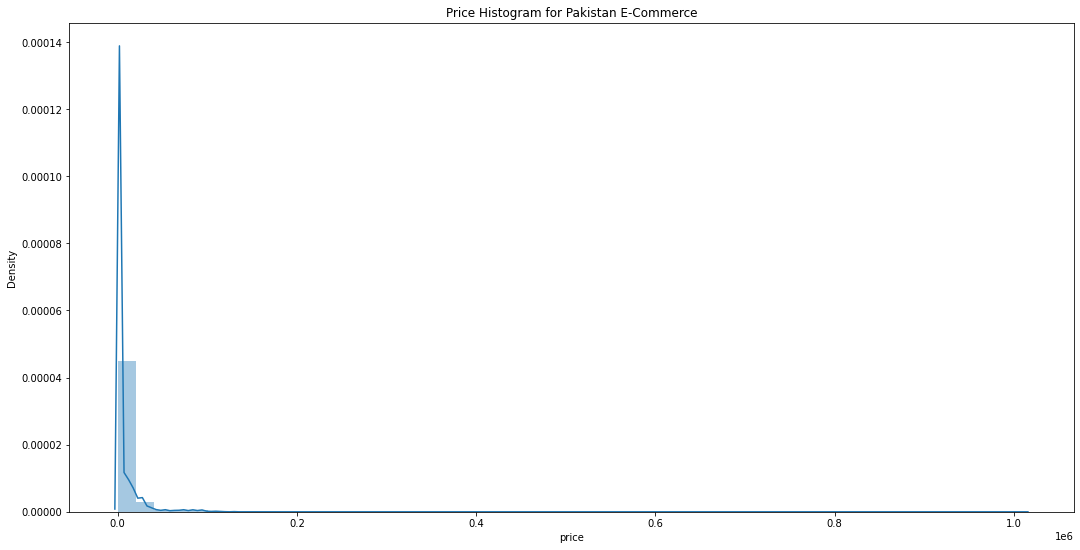

In [93]:
plt.figure(figsize=(18,9))
sns.distplot(df['price'])
plt.title('Price Histogram for Pakistan E-Commerce')
plt.show()

Analisis:
* distribusi price memiliki positive skew yang sangat tinggi menandakan bahwa jumlah transaksi pada harga yang murah jauh lebih banyak daripada harga yang mahal.

Rekomendasi:
* Perusahaan perlu meningkatkan jumlah barang dengan harga yang murah untuk meningkatkan jumlah transaksi karena harga yang tinggi kurang diminati.

## Sales Berdasarkan Waktu

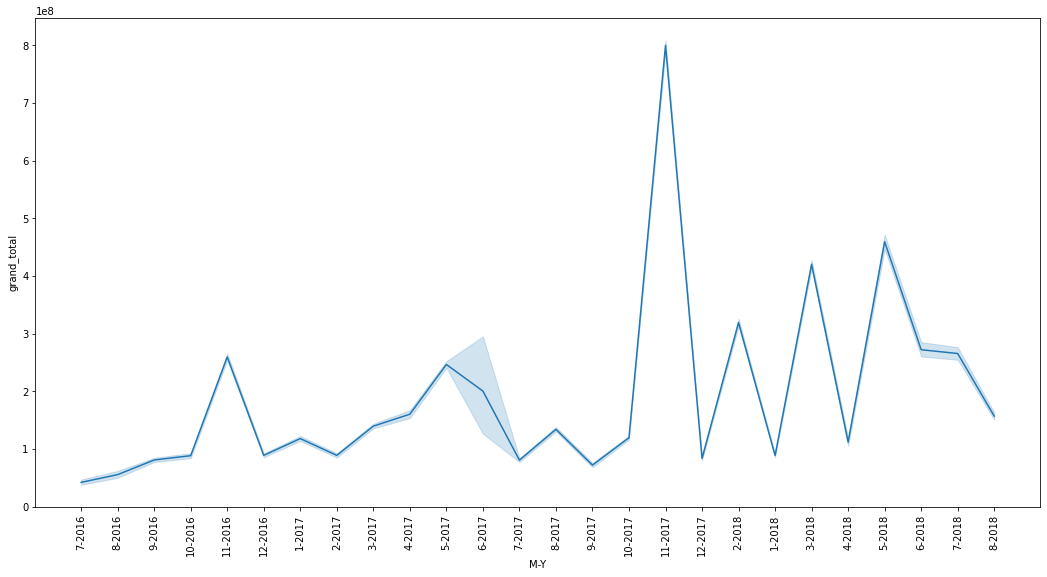

In [94]:
plt.figure(figsize = (18,9))
sns.lineplot(data=df, x='M-Y', y='grand_total', estimator='sum')
plt.xticks(rotation=90)
plt.show()

Analisis:
* Penjualan paling banyak ada di bulan November 2017.
* grafik penjualan memiliki fluktuasi sampai ke pertengahan tahun 2017 lalu grafik mengalami siklus naik turun namun konsisten tinggi di bulan 11 dan bulan 5

Rekomendasi:
* Perusahaan perlu mengubah strategi penjualan agar dapat meningkatkan penjualan seiring waktu sehingga perusahaan dapat sustain dalam jangka waktu yang lama
* Perusahaan perlu meningkatkan produksi barang pada bulan Mei dan November untuk memaksimalkan potensi dari tren penjualan tahunan.

## Sales dan Jumlah Transaksi Berdasarkan Kategori

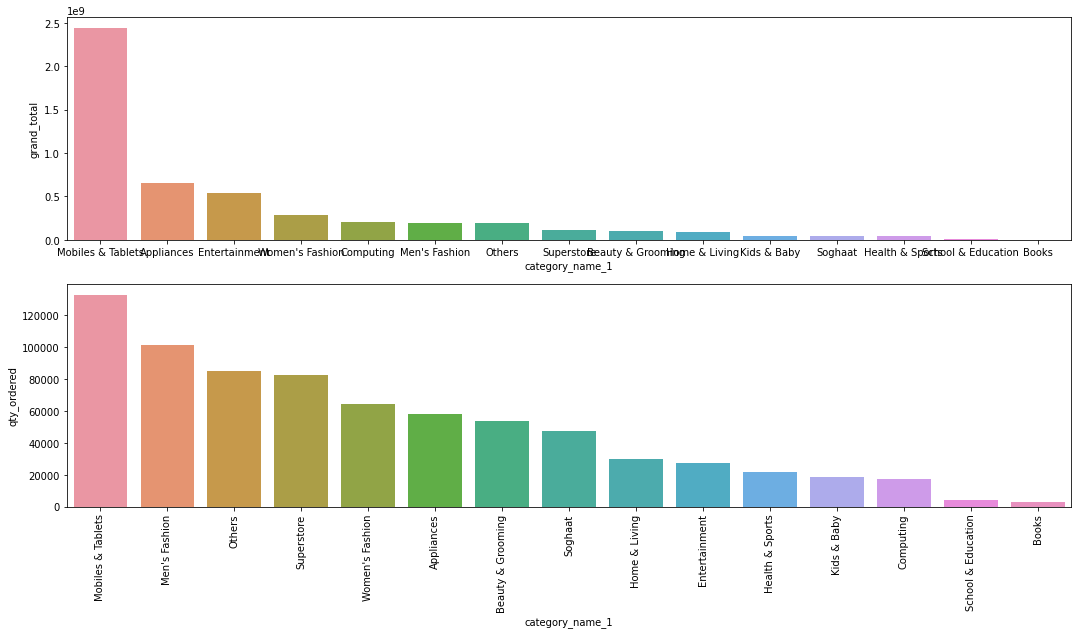

In [95]:
sales_per_kategori = df[['grand_total','category_name_1']].groupby('category_name_1').sum().reset_index()
jumlah_transaksi_per_kategori = df[['qty_ordered','category_name_1']].groupby('category_name_1').sum().reset_index()
plt.figure(figsize = (18,9))
ax1 = plt.subplot(211)
sns.barplot(data=sales_per_kategori, y='grand_total', x='category_name_1', order=sales_per_kategori.sort_values('grand_total',ascending=False)['category_name_1'])
ax2 = plt.subplot(212)
sns.barplot(data=jumlah_transaksi_per_kategori, y='qty_ordered', x='category_name_1', order=jumlah_transaksi_per_kategori.sort_values('qty_ordered',ascending=False)['category_name_1'])
plt.xticks(rotation=90)
plt.show()

Analisis:
* Penjualan dan jumlah pembelian tertinggi ada pada kategori Mobiles & Tablets.
* Jumlah pembelian yang tinggi tidak menandakan penjualan yang tinggi terkecuali untuk kategori Mobiles & Tablets.

Rekomendasi:
* Perusahaan perlu menyediakan lebih banyak stok barang pada kategory Mobiles & Tablets untuk meningkatkan nilai penjualan.
* Perusahaan perlu strategi marketing lebih baik untuk kategori dengan nilai penjualan tinggi seperti Appliances dan Entertainment sehingga memiliki jumlah pembelian yang lebih tinggi untuk meningkatkan nilai penjualan.

## Sales Berdasarkan Metode Pembayaran

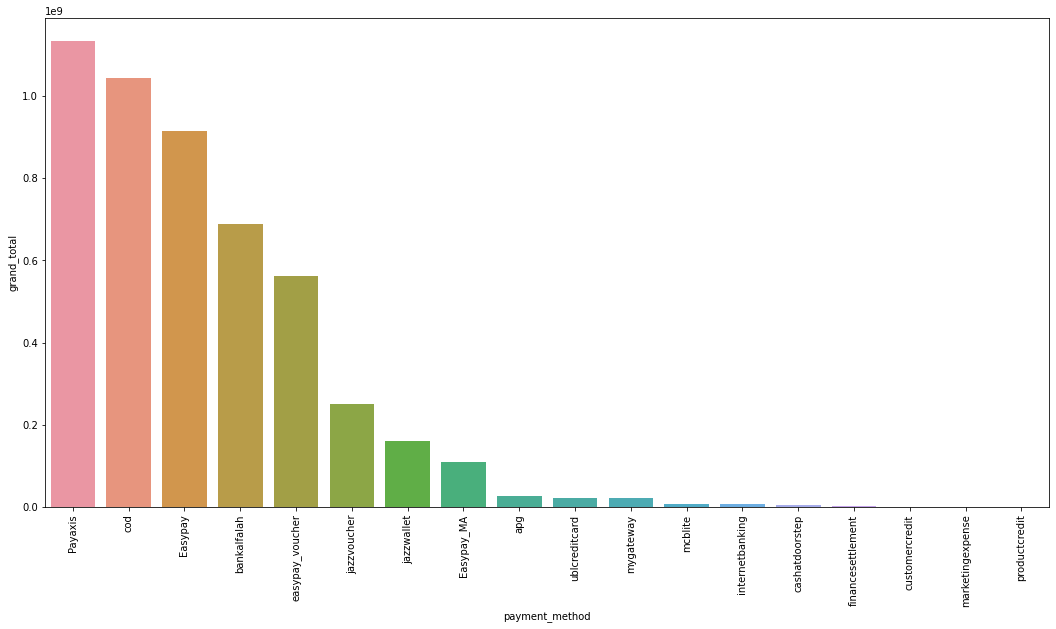

In [97]:
sales_per_kategori = df[['grand_total','payment_method']].groupby('payment_method').sum().reset_index()
plt.figure(figsize = (18,9))
sns.barplot(data=sales_per_kategori, y='grand_total', x='payment_method', order=sales_per_kategori.sort_values('grand_total',ascending=False)['payment_method'])
plt.xticks(rotation=90)
plt.show()

Analisis:
* dengan menggabungkan nilai dari kolom-kolom easypay, easypay memiliki nilai penjualan yang paling tinggi.
* Tiga metode pembayaran yang paling banyak profit adalah Easypay, COD, dan Payaxis.

Rekomendasi:
* Perusahaan perlu menerapkan ketiga metode pembayaran yaitu melalui Easypay, COD, dan Payaxis untuk memaksimalkan potensi penjualan.

## Sales dan Diskon Berdasarkan Bulan

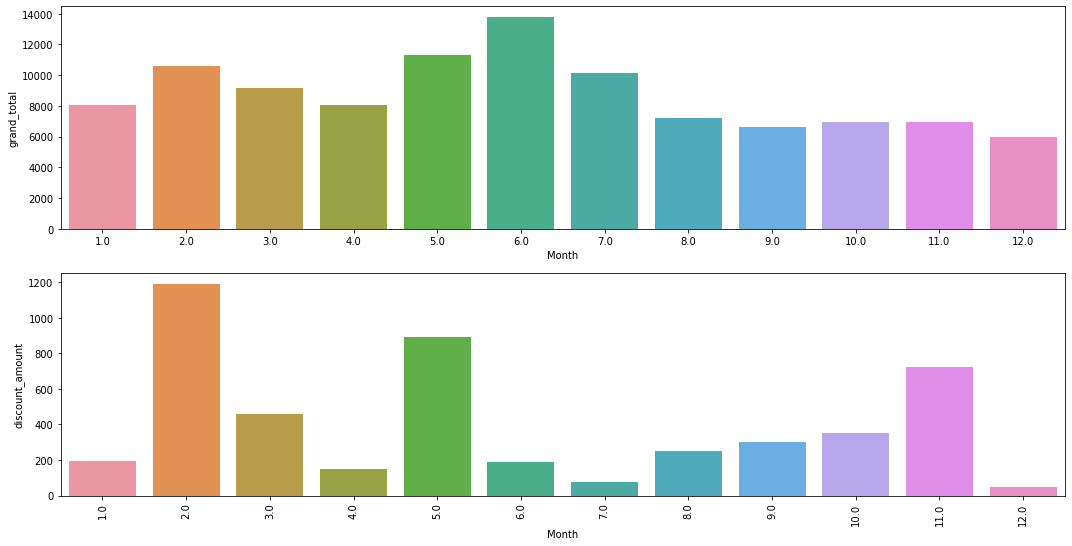

In [100]:
rata2_sales_per_bulan = df[['grand_total','Month']].groupby('Month').mean().reset_index()
rata2_diskon_per_bulan = df[['discount_amount','Month']].groupby('Month').mean().reset_index()
plt.figure(figsize = (18,9))
ax1 = plt.subplot(211)
sns.barplot(data=rata2_sales_per_bulan, y='grand_total', x='Month')
ax2 = plt.subplot(212)
sns.barplot(data=rata2_diskon_per_bulan, y='discount_amount', x='Month')
plt.xticks(rotation=90)
plt.show()

Analisis:
* Rata-rata penjualan di setiap bulan tidak memiliki perubahan yang signifikan.
* rata-rata diskon tertinggi berturut-turut di bulan Februari, Mei, November.
* rata-rata diskon yang tinggi pada bulan Mei dan November menjelaskan tingginya penjualan di kedua bulan tersebut pada grafik Sales Berdasarkan Waktu.

Rekomendasi:
* Perusahaan perlu menekankan diskon di bulan Mei dan November untuk meningkatkan penjualan.
* Perusahaan perlu mengurangi diskon di bulan Februari untuk mengurasi pengurangan nilai penjualan.

# Kesimpulan

Untuk menjawab pertanyaan:
* Bagaimanakah cara untuk meningkatkan nilai penjualan?

Rekomendasi yang saya berikan dari analisis pada dataset Pakistan's Largest E-Commerce Dataset adalah sebagai berikut:
1. Perusahaan perlu meningkatkan jumlah barang dengan harga yang murah untuk meningkatkan jumlah transaksi karena harga yang tinggi kurang diminati.
1. Perusahaan perlu mengubah strategi penjualan agar dapat meningkatkan penjualan seiring waktu sehingga perusahaan dapat sustain dalam jangka waktu yang lama
1. Perusahaan perlu meningkatkan produksi barang pada bulan Mei dan November untuk memaksimalkan potensi dari tren penjualan tahunan.
1. Perusahaan perlu menyediakan lebih banyak stok barang pada kategory Mobiles & Tablets untuk meningkatkan nilai penjualan.
1. Perusahaan perlu strategi marketing lebih baik untuk kategori dengan nilai penjualan tinggi seperti Appliances dan Entertainment sehingga memiliki jumlah pembelian yang lebih tinggi untuk meningkatkan nilai penjualan.
1. Perusahaan perlu menerapkan ketiga metode pembayaran yaitu melalui Easypay, COD, dan Payaxis untuk memaksimalkan potensi penjualan.
1. Perusahaan perlu menekankan diskon di bulan Mei dan November untuk meningkatkan penjualan.
1. Perusahaan perlu mengurangi diskon di bulan Februari untuk mengurasi pengurangan nilai penjualan.